Загрузка данных

In [172]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [173]:
data = pd.read_csv("https://raw.githubusercontent.com/AndreyCh1989/ML-netology/main/%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F%3A%20%D0%9B%D0%BE%D0%B3%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F%20%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F%20%D0%B8%20SVM/adult.csv")
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


Первичный анализ **данных**

In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [175]:
data['workclass'].unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

С первого взгляда как таковых пустых значений нет, но есть ячейки со значением "?" -> заменю их на NA и уберу эти объекты

In [176]:
data = data.replace('?', pd.NA)

In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [178]:
data = data[~(data['workclass'].isna())]
data = data[~(data['occupation'].isna())]
data = data[~(data['native-country'].isna())]

In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


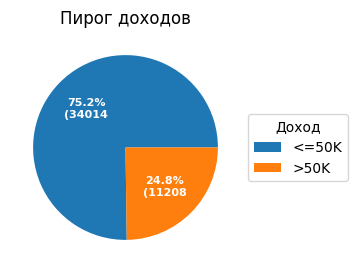

In [180]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

incomes = data['income'].unique()
items = [data[data['income'] == i][data.columns[0]].count() for i in incomes]

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d}"


wedges, texts, autotexts = ax.pie(items, autopct=lambda pct: func(pct, items),
                                  textprops=dict(color="w"))

ax.legend(wedges, incomes,
          title="Доход",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Пирог доходов")

plt.show()

Преобразование признаков

In [181]:
X = pd.get_dummies(data, columns=['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country'])
# решил удалить "education" т.к. дублируется колонкой "education-num"
del X['education']
# целевой параметр
del X['income']
X.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,34,198693,6,0,0,30,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [182]:
le = LabelEncoder()

le.fit(data['income'])

y = pd.Series(data=le.transform(data['income']))
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int64

Обучаю модели логистической регрессии

In [183]:
model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [185]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [186]:
predictions[:5]

array([0, 0, 0, 0, 0])

In [187]:
y_test[:5]

20084    0
20027    0
39505    1
39534    0
12586    0
dtype: int64

In [188]:
model.predict_proba(X_test)

array([[0.99820617, 0.00179383],
       [0.93395825, 0.06604175],
       [0.54082607, 0.45917393],
       ...,
       [0.7861418 , 0.2138582 ],
       [0.82391256, 0.17608744],
       [0.989663  , 0.010337  ]])

In [189]:
model.score(X_train, y_train)

0.848494900074633

In [190]:
model.score(X_test, y_test)

0.8506357103372029

Обучаю модели опорных векторов

In [191]:
clf = make_pipeline(StandardScaler(), SVC())
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [192]:
clf.score(X_train, y_train)

0.8534704370179949

In [193]:
clf.score(X_test, y_test)

0.8494195688225539

В итоге были получены результаты для обучающего и тестового множеств при использовании модели логистической регресси и модели обучающих векторов. Были получены следующие результаты:

```
                    | Логистическая регрессия | Обучающие вектора    |
Обучающее множество   | 0.848494900074633  | 0.8534704370179949 |
Тестовое множество     | 0.8506357103372029 | 0.8494195688225539 |
```

Точность 2 методов выглядит примерно одинаковой, но время обучения и получения результата при использовании модели опорных векторов в разы дольше.

Для получения результата были сделаны следующие модификации с данными:
1.   get_dummies - `['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']`
2.   LabelEncoder - `['income']`
3.   колонка `education` была удалена из анализа т.к. дублируется колонкой `educational-num`


